In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn import preprocessing
import plotly.graph_objects as go

In [50]:
data = pd.read_csv('../common/Country-data.csv', sep=',')

In [3]:
#data = pd.read_csv('../pr5/Traffic.csv', sep=',')

In [51]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [53]:
data.duplicated().sum()

0

In [54]:
data.drop_duplicates(inplace = True)

In [55]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [56]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [57]:
data.dropna(inplace=True)

In [58]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [59]:
data1 = data.copy()

data1.drop('country', axis=1, inplace=True)
#data1.drop('Date', axis=1, inplace=True)
#data1.drop('Day of the week', axis=1, inplace=True)
#data1.drop('Time', axis=1, inplace=True)
#data1.drop('Traffic Situation', axis=1, inplace=True)
#data1.drop('Total', axis=1, inplace=True)

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0 KB


<Axes: >

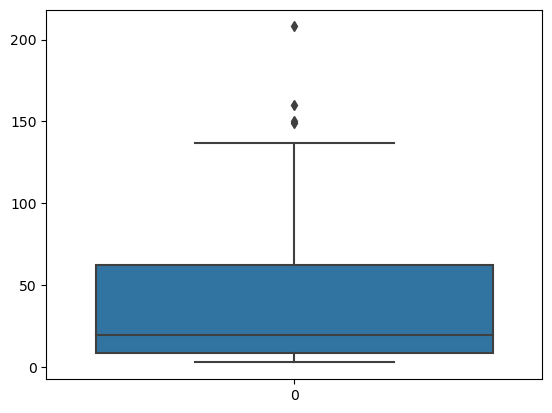

In [61]:
sns.boxplot(data = data1.child_mort)

<Axes: >

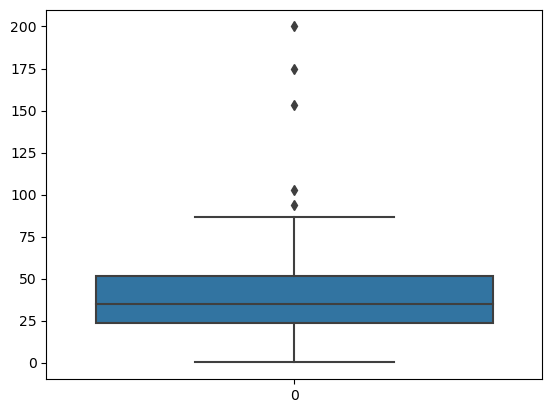

In [62]:
sns.boxplot(data = data1.exports)

<Axes: >

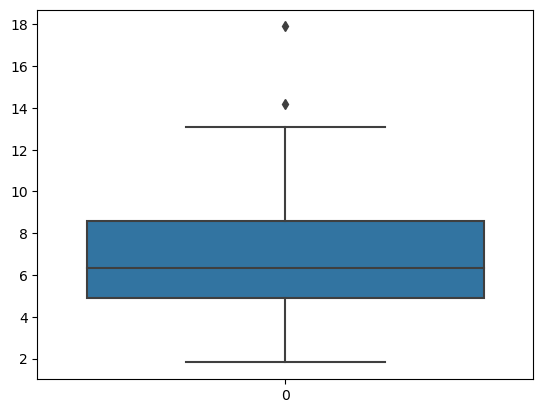

In [63]:
sns.boxplot(data = data1.health)

<Axes: >

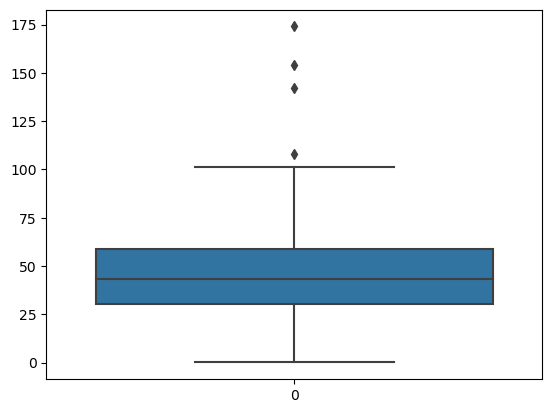

In [64]:
sns.boxplot(data = data1.imports)

<Axes: >

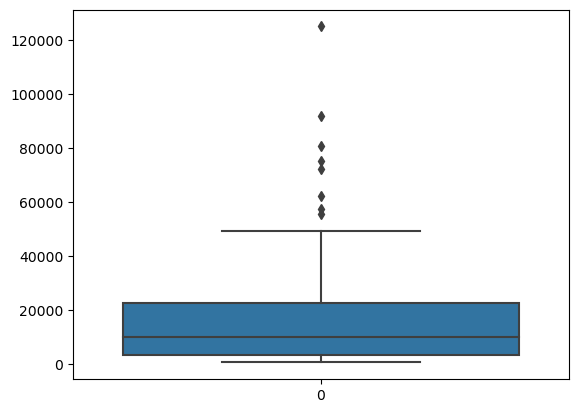

In [65]:
sns.boxplot(data = data1.income)

<Axes: >

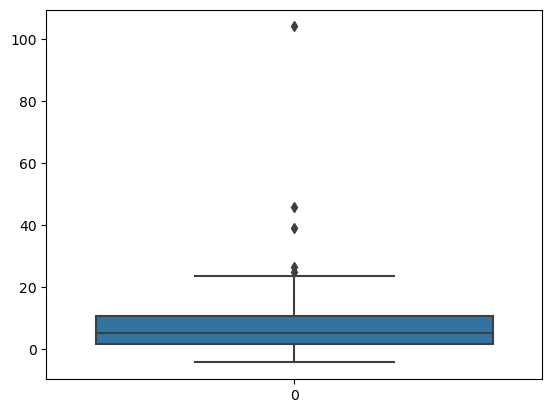

In [66]:
sns.boxplot(data = data1.inflation)

<Axes: >

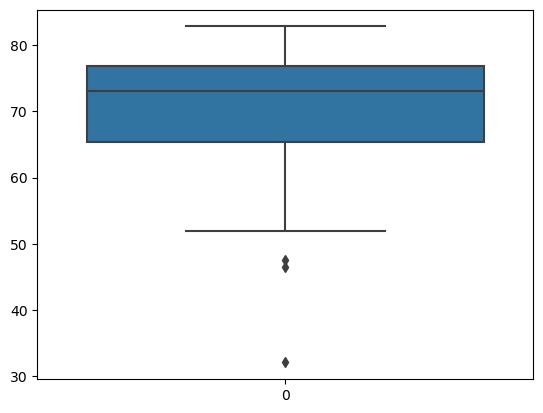

In [67]:
sns.boxplot(data = data1.life_expec)

<Axes: >

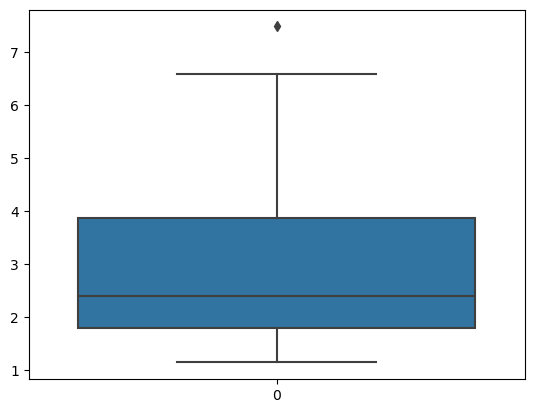

In [68]:
sns.boxplot(data = data1.total_fer)

<Axes: >

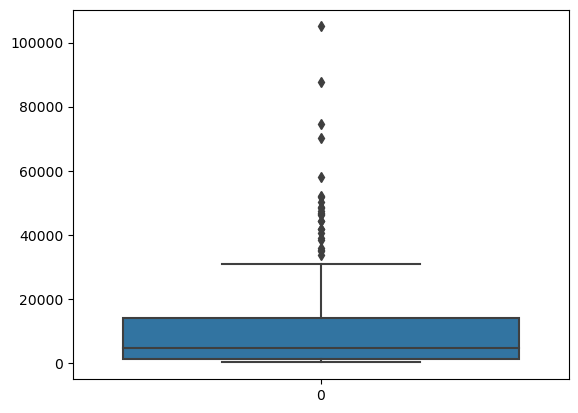

In [69]:
sns.boxplot(data = data1.gdpp)

In [70]:
scaller = preprocessing.MinMaxScaler()
data1 = pd.DataFrame(scaller.fit_transform(data1), columns=data1.columns)

In [71]:
data1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [72]:
models = []
score1 = []
score2 = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state = 123, init='k-means++').fit(data1)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data1, model.labels_))

c:\Users\vovaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\vovaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\vovaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\vovaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\vov

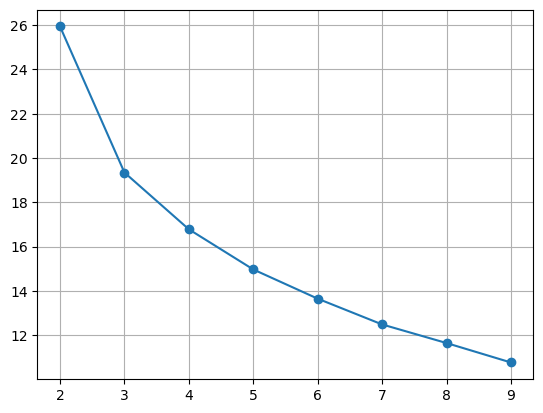

In [73]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker = 'o')
plt.show()

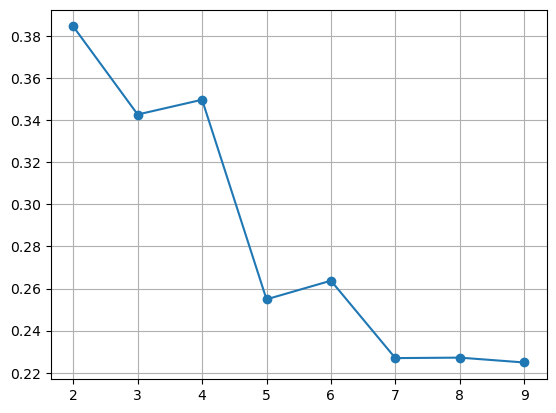

In [74]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker = 'o')
plt.show()

In [75]:
model1 = KMeans(n_clusters=3, random_state = 123, init='k-means++').fit(data1)
data_KMeans = data1.copy()
data_KMeans['Cluster'] = model1.labels_

c:\Users\vovaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\vovaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [76]:
data_KMeans['Cluster'].value_counts()

0    87
1    46
2    34
Name: Cluster, dtype: int64

In [77]:
model1.cluster_centers_

array([[0.0956586 , 0.20354231, 0.27564776, 0.27148825, 0.09891936,
        0.1084663 , 0.79913396, 0.1787592 , 0.06301822],
       [0.44150332, 0.14597042, 0.28144675, 0.24855348, 0.02337632,
        0.15069832, 0.5383329 , 0.62148539, 0.01398231],
       [0.01088264, 0.28914199, 0.44196249, 0.29131375, 0.36819242,
        0.0628897 , 0.95237267, 0.09468361, 0.41678415]])

In [78]:
model2 = AgglomerativeClustering(3, compute_distances=True).fit(data1)
data_Agglomerative = data1.copy()
data_Agglomerative['Cluster']=model2.labels_

In [79]:
data_Agglomerative['Cluster'].value_counts()

2    92
1    41
0    34
Name: Cluster, dtype: int64

### DBSCAN

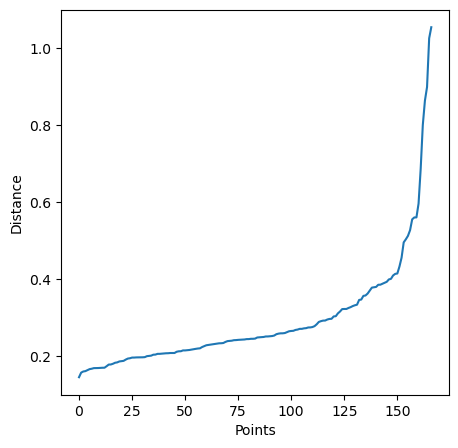

In [80]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data1)
distances, indices = neighbors.kneighbors(data1)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

0.39046708962731175


<Figure size 500x500 with 0 Axes>

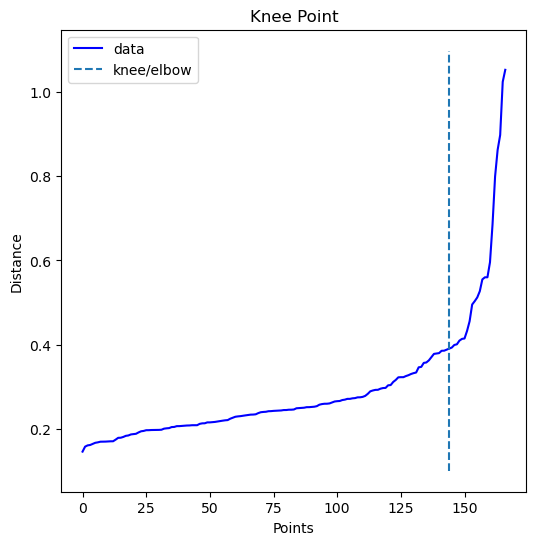

In [81]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [106]:
model3 = DBSCAN(eps=0.24, min_samples=9).fit(data1)
data_DBSCAN = data1.copy()
data_DBSCAN['Cluster'] = model3.labels_

In [107]:
data_DBSCAN['Cluster'].value_counts()

 1    103
-1     41
 0     23
Name: Cluster, dtype: int64

In [113]:
for i in range(1, 100):
    for j in range(1,50):
        model = DBSCAN(eps=j/100, min_samples=i).fit(data1)
        data_DBSCAN = data1.copy()
        data_DBSCAN['Cluster'] = model.labels_
        a = data_DBSCAN['Cluster'].value_counts()
        if len(a) == 3:
            print(a, i)

-1    163
 0      2
 1      2
Name: Cluster, dtype: int64 2
 0    135
-1     30
 1      2
Name: Cluster, dtype: int64 2
 0    138
-1     27
 1      2
Name: Cluster, dtype: int64 2
 0    146
-1     18
 1      3
Name: Cluster, dtype: int64 2
 0    149
-1     15
 1      3
Name: Cluster, dtype: int64 2
 0    151
-1     13
 1      3
Name: Cluster, dtype: int64 2
 0    152
-1     12
 1      3
Name: Cluster, dtype: int64 2
 0    152
-1     12
 1      3
Name: Cluster, dtype: int64 2
-1    157
 1      6
 0      4
Name: Cluster, dtype: int64 3
 0    126
-1     37
 1      4
Name: Cluster, dtype: int64 3
 0    129
-1     34
 1      4
Name: Cluster, dtype: int64 3
 0    140
-1     24
 1      3
Name: Cluster, dtype: int64 3
 0    142
-1     22
 1      3
Name: Cluster, dtype: int64 3
 0    146
-1     18
 1      3
Name: Cluster, dtype: int64 3
 0    149
-1     15
 1      3
Name: Cluster, dtype: int64 3
 0    151
-1     13
 1      3
Name: Cluster, dtype: int64 3
 0    152
-1     12
 1      3
Name: Clus

In [108]:
t = TSNE(n_components=3, perplexity=25)
TSNE_features = t.fit_transform(data_KMeans)
fig = go.Figure(data=[go.Scatter3d(x = TSNE_features[:, 0], y=TSNE_features[:, 1], z=TSNE_features[:, 2],
                                   mode='markers', marker_color=data_KMeans['Cluster'])])
fig.show()

In [46]:
TSNE_features = t.fit_transform(data_Agglomerative)
fig = go.Figure(data=[go.Scatter3d(x=TSNE_features[:, 0], y=TSNE_features[:, 1], z=TSNE_features[:, 2],
                                   mode='markers', marker_color=data_Agglomerative['Cluster'])])
fig.show()

In [47]:
TSNE_features = t.fit_transform(data_DBSCAN)
fig = go.Figure(data=[go.Scatter3d(x=TSNE_features[:, 0], y=TSNE_features[:, 1], z=TSNE_features[:, 2],
                                   mode='markers', marker_color=data_DBSCAN['Cluster'])])
fig.show()